#%% [markdown]

 # requirements

In [ ]:
import math
import itertools
import numpy as np
import pandas as pd
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt
# root path
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
sys.path.append(project_root)

# Now you can import from src
from src.app.utils import open_json

#%% [markdown]

 # data

In [ ]:
df = pd.read_json('../data/data_jobs.json')
df

,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date
0,Data Scientist - Work from home,Nearsure,Bogotá D.C. Metropolitan Area,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/data-scienti...,Information Technology,Software Development,Explore the Nearsure experience!\n\n\n\n\n🌐 Jo...,,2025-02-28,Senior AI Engineer,colombia,2025-03-01
1,Senior Machine Learning Engineer,EPAM Systems,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-machi...,"Engineering, Information Technology, and Research","Software Development, IT Services and IT Consu...",EPAM is a leading global provider of digital p...,,2025-02-28,Senior AI Engineer,colombia,2025-03-01
2,Vacante Afirmativa para Mujeres - Ingeniería A...,Oracle,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/vacante-afir...,Education and Training,IT Services and IT Consulting,Job Description\n\nVacante Afirmativa para Muj...,,2025-02-28,Senior AI Engineer,colombia,2025-03-01
3,Data Scientist - Work from home,Nearsure,Bogotá D.C. Metropolitan Area,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/data-scienti...,Information Technology,Software Development,Explore the Nearsure experience!\n\n\n\n\n🌐 Jo...,,2025-02-28,Machine Learning,colombia,2025-03-01
4,Compliance Data Analyst,Sezzle,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/compliance-d...,Information Technology,Financial Services,Compliance Data Analyst Role\n\nAbout Sezzle:\...,,2025-02-28,Machine Learning,colombia,2025-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,"Profesional de Desarrollo, Bienestar y Cultura",Scania Group,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/profesional-...,Other,Motor Vehicle Manufacturing,"Cargo: Profesional de Desarrollo, Bienestar y ...",,2025-03-01,Gestión de proyectos en salud,colombia,2025-03-01
5718,Líder en Gestión Inmobiliaria Universitaria Re...,Universidad CES,"Medellín, Antioquia, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/l%C3%ADder-e...,Other,"Business Consulting and Services, Executive Of...",Líder en Gestión Inmobiliaria Universitaria\n\...,,2025-03-01,Gestión de proyectos en salud,colombia,2025-03-01
5719,HR Specialist,Adistec,"Bogotá, Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/hr-specialis...,Human Resources,Software Development,Misión del Puesto\n\nUn HR Specialist es respo...,,2025-02-28,Gestión de proyectos en salud,colombia,2025-03-01
5720,Médico (a) Auditor (a) Auditaría Integral,Fundación Cardiovascular de Colombia,"Floridablanca, Santander, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/m%C3%A9dico-...,Health Care Provider,Hospitals and Health Care,La Fundación Cardiovascular de Colombia y el H...,,2025-03-01,Auditoría de calidad en servicios de salud,colombia,2025-03-01


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5722 entries, 0 to 5721
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           5722 non-null   object
 1   company                5722 non-null   object
 2   location               5722 non-null   object
 3   work_modality_english  5722 non-null   object
 4   seniority              5722 non-null   object
 5   link                   5722 non-null   object
 6   job_function           5722 non-null   object
 7   industries             5722 non-null   object
 8   description            5722 non-null   object
 9   apply_link             5722 non-null   object
 10  publication_date       5722 non-null   object
 11  query_keyword          5722 non-null   object
 12  country                5722 non-null   object
 13  scraping_date          5722 non-null   object
dtypes: object(14)
memory usage: 670.5+ KB


In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

[]

In [ ]:
#%%

df.describe().T

,count,unique,top,freq
vacancy_name,5722,1933,Machine Learning Engineer,201
company,5722,1449,PwC,120
location,5722,678,United States,505
work_modality_english,5722,3,Full-time,5715
seniority,5722,7,Mid-Senior level,3209
link,5722,5722,https://co.linkedin.com/jobs/view/data-scienti...,1
job_function,5722,210,Engineering and Information Technology,2153
industries,5722,393,Software Development,1000
description,5722,2309,Outlier helps the world’s most innovative comp...,66
apply_link,5722,1,,5722


In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,5722,1933,Machine Learning Engineer,201
company,5722,1449,PwC,120
location,5722,678,United States,505
work_modality_english,5722,3,Full-time,5715
seniority,5722,7,Mid-Senior level,3209
link,5722,5722,https://co.linkedin.com/jobs/view/data-scienti...,1
job_function,5722,210,Engineering and Information Technology,2153
industries,5722,393,Software Development,1000
description,5722,2309,Outlier helps the world’s most innovative comp...,66
apply_link,5722,1,,5722


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['Data Scientist - Work from home' 'Senior Machine Learning Engineer'
 'Vacante Afirmativa para Mujeres - Ingeniería AI - Cloud Solution Engineer AI'
 ... 'Líder en Gestión Inmobiliaria Universitaria Req-425' 'HR Specialist'
 'Médico (a) Auditor (a) Auditaría Integral']
------>vacancy_name : vacancy_name
Machine Learning Engineer                                  201
Data Scientist                                             152
AI & GenAI Data Scientist-Senior Associate                  64
Consultant, Data Analytics & Visualization (Mid-Level)      63
Data Analyst                                                63
                                                          ... 
Desktop Support Engineer                                     1
Lead iOS Engineer                                            1
Senior Principal AI Engineer, Product Security (REMOTE)      1
Senior Software Engineer, AI Applications                    1
Médico (a) Auditor (a) Auditaría Integral 

#%%[markdown]

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

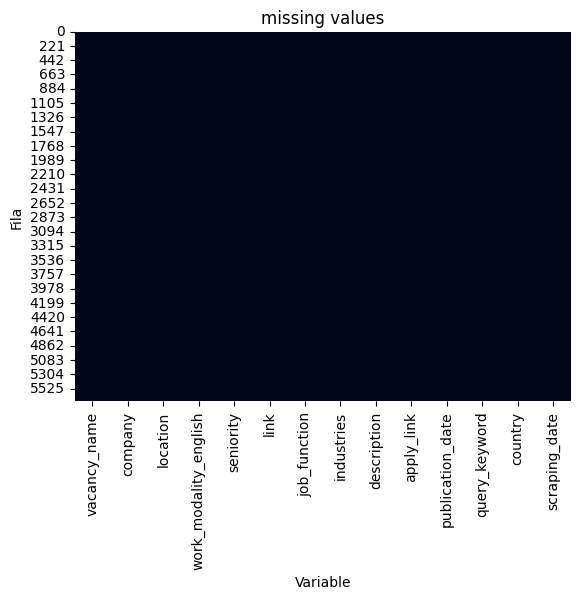

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

/home/usuario/Documents/jobbot/venv_jobbot/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/usuario/Documents/jobbot/venv_jobbot/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


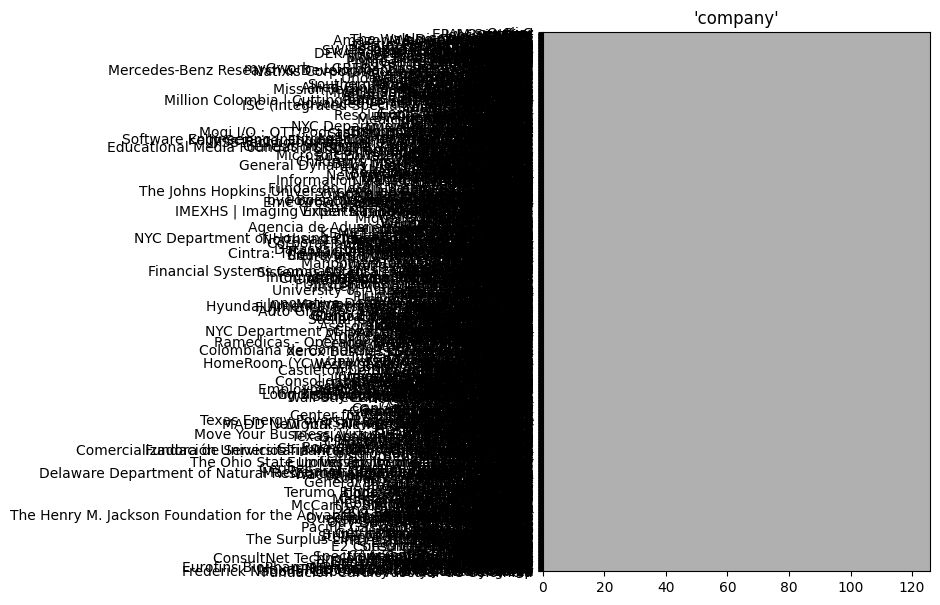

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

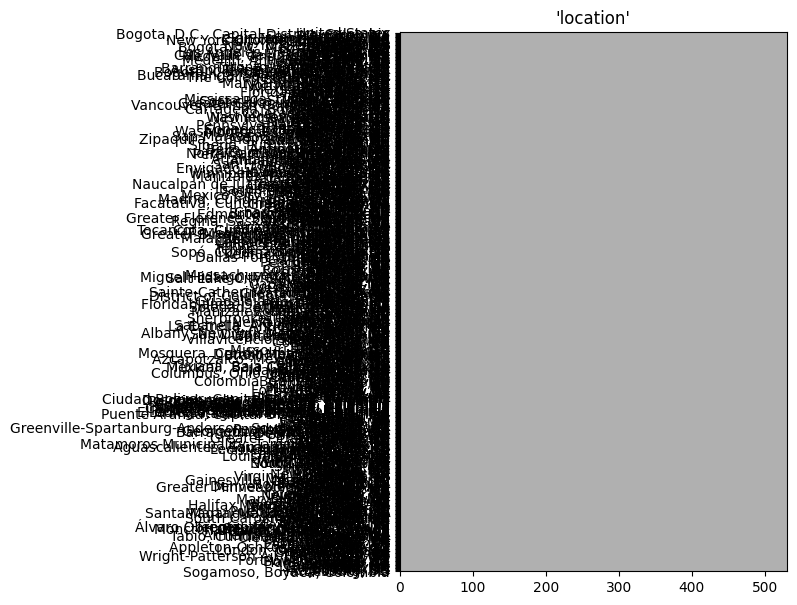

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

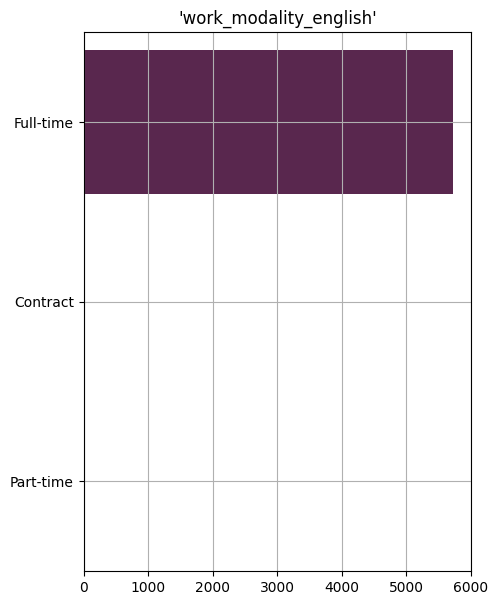

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

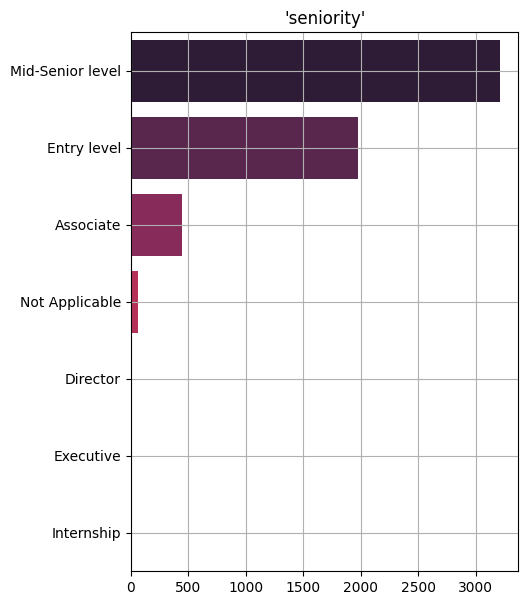

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

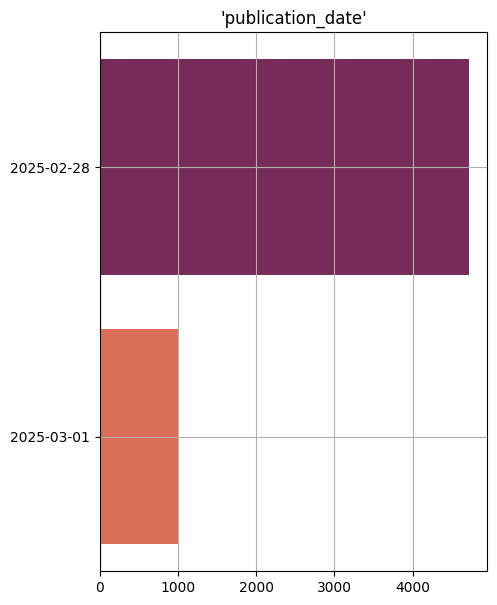

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # knowledge based filters

In [ ]:
#%%

job_seeker = open_json('../data/job_seekers.json')
job_seeker[0].keys()
seniority_criteria = job_seeker[0]['seniority']
location_criteria = job_seeker[0]['location']
work_modality_criteria = job_seeker[0]['work_modality_english']
excluded_companies = ["BairesDev"]

reading file at: ../data/job_seekers.json


In [ ]:
# %%

df_filtered = df[
    (df["seniority"].isin(seniority_criteria)) &  # Filter by seniority
    (df["location"].isin(location_criteria)) &    # Filter by location
    (df["work_modality_english"].isin(work_modality_criteria)) &  # Filter by work modality
    (~df["company"].isin(excluded_companies))     # Exclude specified companies
].copy()
df_filtered.shape

(4519, 14)

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

/home/usuario/Documents/jobbot/venv_jobbot/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/usuario/Documents/jobbot/venv_jobbot/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


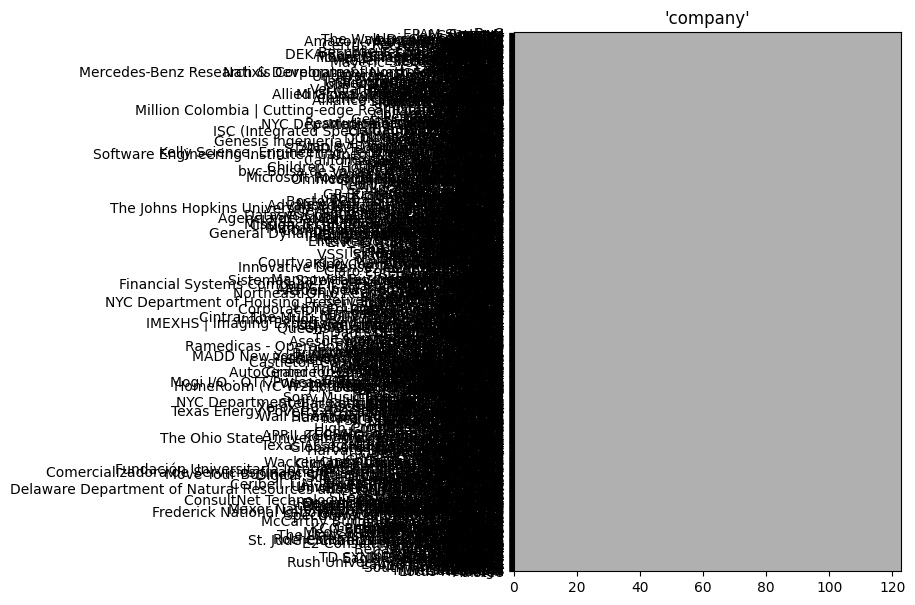

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['company'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

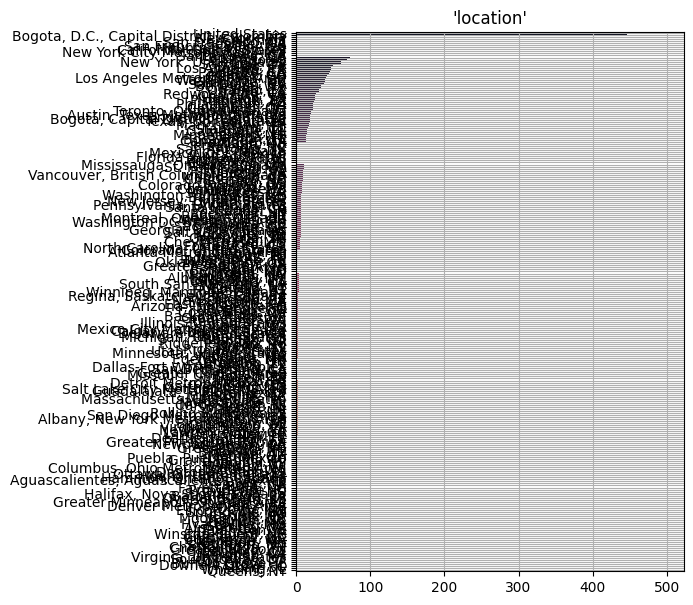

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['location'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

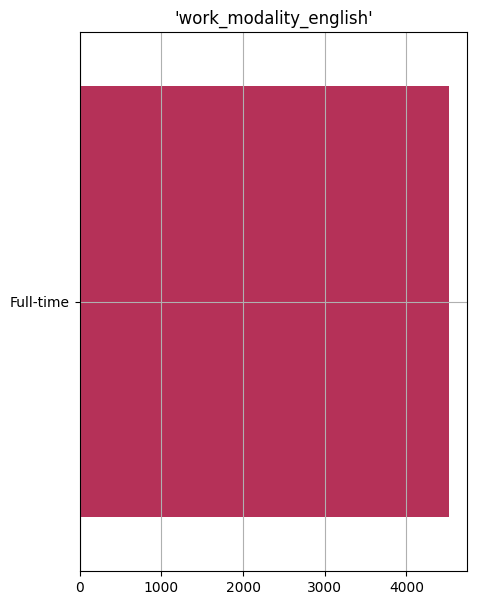

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

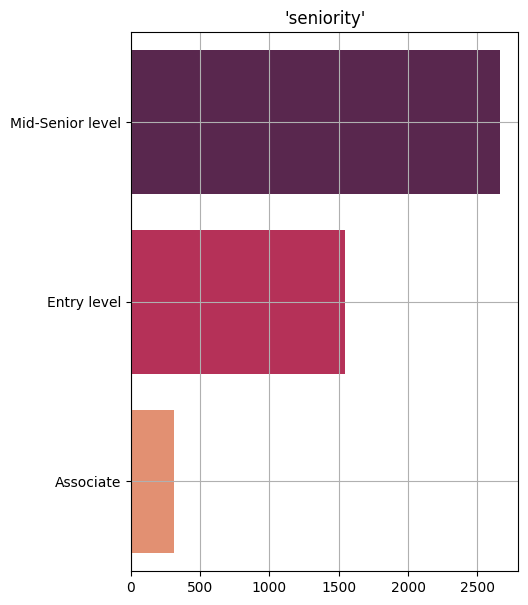

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

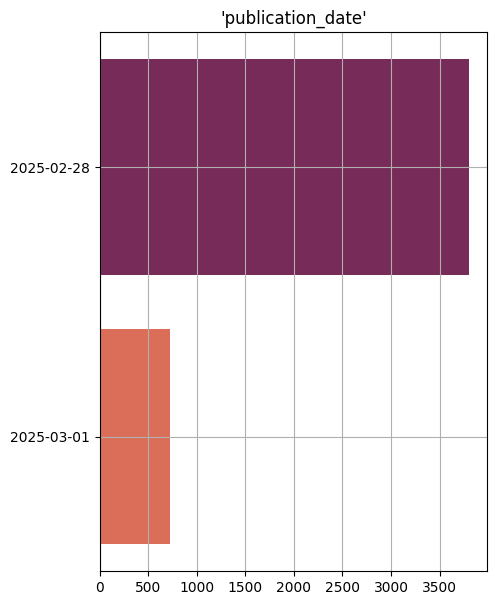

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")